### Basic Holography

This example shows how to:

1. Make and visualize a target far-field pattern (a spot array)
2. Solve for the associated near-field phase mask using GPU accelerated GS algorithms 
3. Monitor GS algorithm convergence
4. Perform GS optimization with more general targets

In [1]:
# Header
# basic ipython configuration 
# (reload source code automatically and plots inline)
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os, sys
import numpy as np
import matplotlib.pyplot as plt
try:
    import cupy as cp
except:
    cp = np
import cv2

# Add slmsuite to the python path. TODO: Remove and replace with package import
sys.path.append(os.path.join(os.getcwd(), '../..'))
# Import GS algorithms
# from slmsuite.holography.algorithms import FastGS
# Import spot array class for target generation
# from slmsuite.holography.SpotArray import SpotArray
from slmsuite.holography.algorithms import Hologram
import slmsuite.holography.lcos_toolbox as lcos_toolbox

No cupy installed, using numpy.


In [2]:
# Hologram creation and optimization
# Now lets try something other than spots, like a picture:
path = os.path.join(os.getcwd(), '../static/qp-slm-small.png')
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

# This logo has white background, so we invert such that the field is dark.
img = cv2.bitwise_not(img)

# Resize (zero pad) for GS.
shape = (1024,1024)
target = lcos_toolbox.pad(img, shape)

holograms = {}

for method in ["GS", "WGS-Kim"]:
    holograms[method] = Hologram(target)
    holograms[method].optimize(method=method, maxiter=50, stat_groups=['computational'])

100%|██████████| 50/50 [00:10<00:00,  4.55it/s]


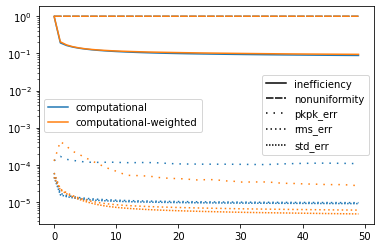

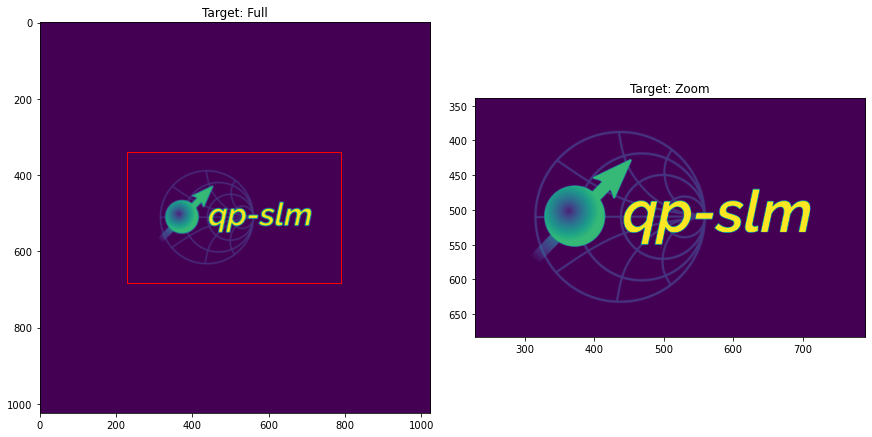

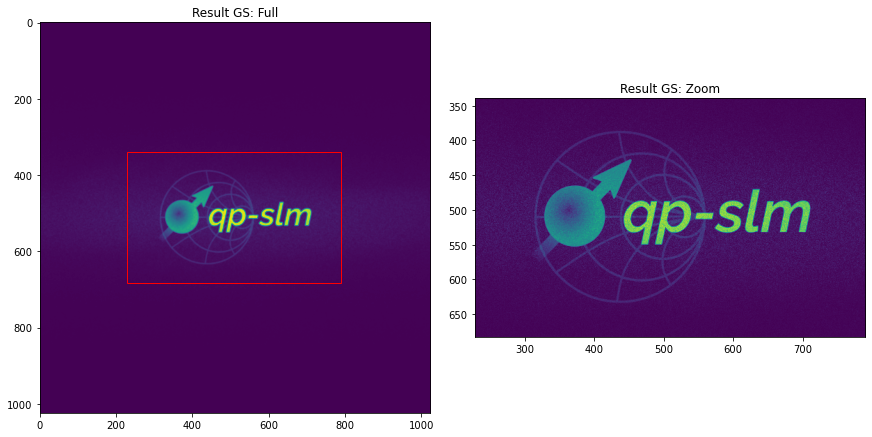

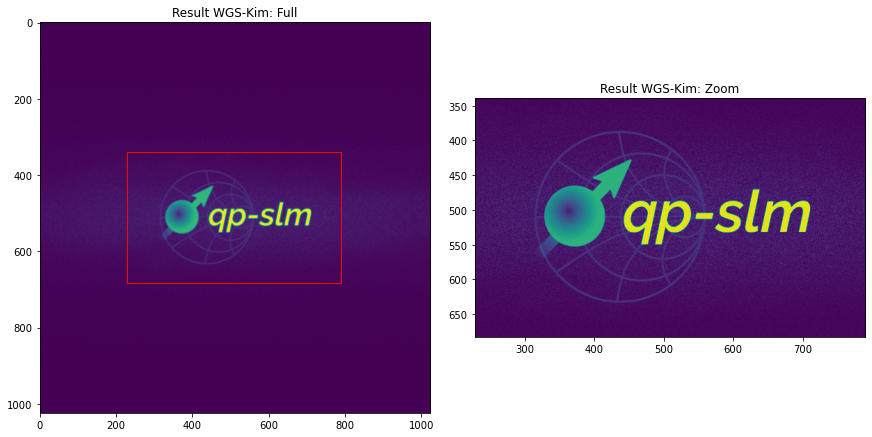

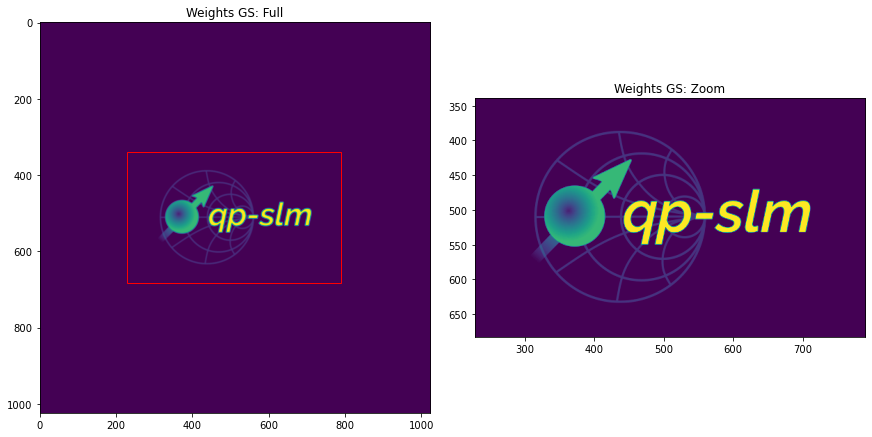

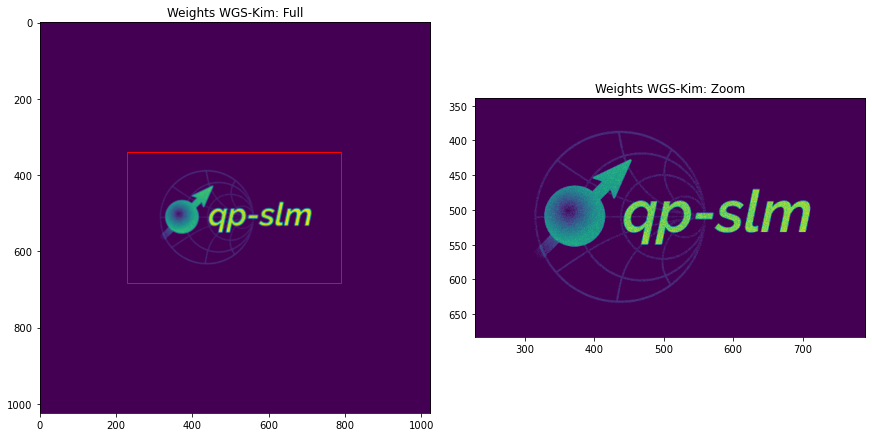

In [3]:
# Plotting
# Stats
statscombined = holograms["GS"].stats
statscombined["stats"]["computational-weighted"] = \
    holograms["WGS-Kim"].stats["stats"]["computational"]

holograms["GS"].plot_stats(statscombined)

# Farfield plots
limits = holograms["GS"].plot_farfield()

# Comparisons
for method in ["GS", "WGS-Kim"]:
    holograms[method].plot_farfield(source=holograms[method].amp_ff, 
        limits=limits, title='Result ' + method)

for method in ["GS", "WGS-Kim"]:
    holograms[method].plot_farfield(source=holograms[method].weights, 
        limits=limits, title='Weights ' + method)

In [4]:
from slmsuite.holography.algorithms import SpotHologram

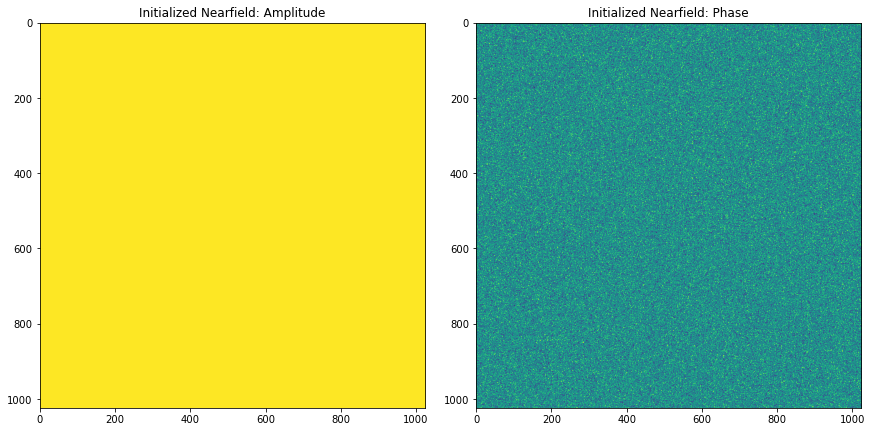

100%|██████████| 50/50 [00:10<00:00,  4.94it/s]


In [5]:
# Setup a basic spot array
shape = (1024, 1024)
array_hologram = SpotHologram.make_rectangular_array(shape,
    array_shape=(20,10), array_pitch=(5,10), basis='knm')

array_hologram.plot_nearfield(title='Initialized Nearfield')

array_hologram.optimize(method="WGS-Kim", maxiter=50, stat_groups=['computational'])

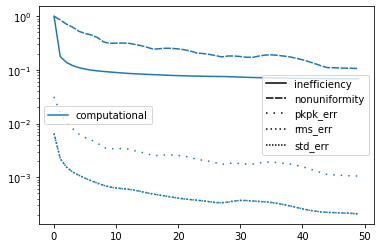

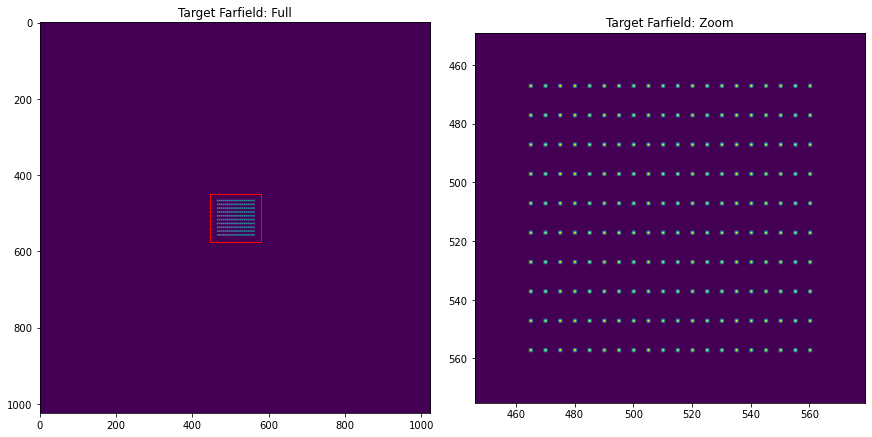

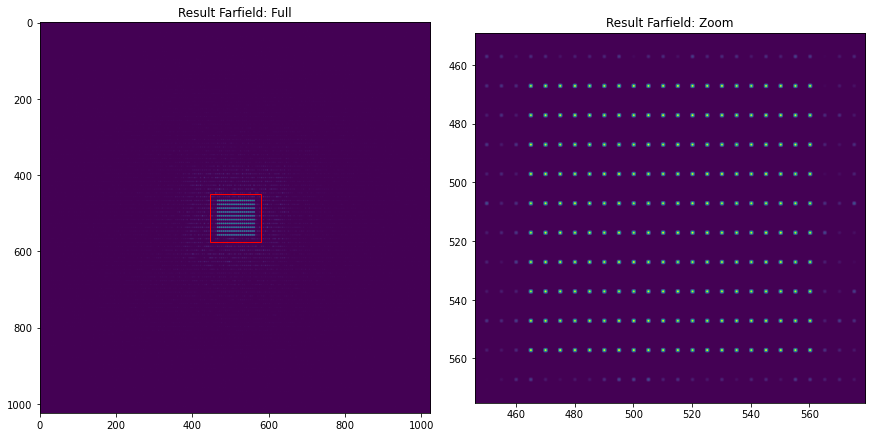

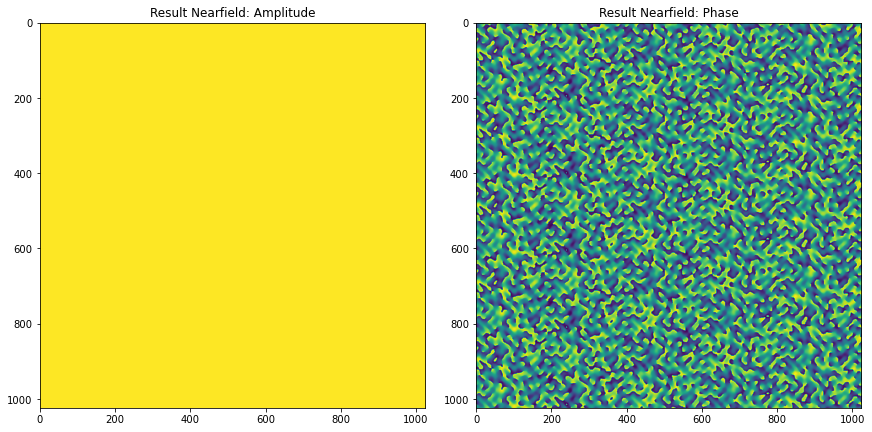

In [6]:
# Spot array plots and stats
array_hologram.plot_stats()

limits = array_hologram.plot_farfield(title='Target Farfield')
array_hologram.plot_farfield(source=array_hologram.amp_ff, 
    limits=limits, title='Result Farfield')

array_hologram.plot_nearfield(title='Result Nearfield')

In [ ]:
for rot in range(4):
    for flip in range(2):
        print(rot, flip)
        transform = image_analysis.get_orientation_transformation(rot=rot, fliplr=flip, flipud=False)
        orientation = image_analysis.blob_array_detect(transform(img), [15,10], plot=True)